# Web Scraping 

**This notebook scrapes all books from this site  https://books.toscrape.com/**

---

**Import Libraries**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import os
import csv
from urllib.parse import urljoin


#### **Getting The `Respond` from Website**

In [2]:
url = "https://books.toscrape.com/"
response = requests.get(url)
res = response.status_code

**Check For `Authority`**

In [3]:
if res == 200:
    print("Successfully fetched the webpage ")
else:
    print(f"Failed To fetch due to {res} error")

Successfully fetched the webpage 


**Getting The `HTML code`**

In [8]:
soup = BeautifulSoup(response.text,'html.parser')
print(soup)

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

---

**Getting `The Title` of Webpage**

In [9]:
Title = soup.find("title").get_text().strip().split('|')[1]
print(Title)

 Books to Scrape - Sandbox


**Getting The `Name` of Categories**

In [10]:
Categories = soup.find('ul', attrs={"class" : "nav nav-list"})

In [7]:
Categories

<ul class="nav nav-list">
<li>
<a href="catalogue/category/books_1/index.html">
                            
                                Books
                            
                        </a>
<ul>
<li>
<a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/sequential-art_5/index.html">
                            
                                Sequential Art
                            
           

In [12]:
categories = Categories.find_all('a')
category_names = [category.get_text(strip=True) for category in categories]
category_names.remove("Books")
print("Organized Categories:")
for index, category in enumerate(category_names, start=1):
    print(f"{index}. {category}")

Organized Categories:
1. Travel
2. Mystery
3. Historical Fiction
4. Sequential Art
5. Classics
6. Philosophy
7. Romance
8. Womens Fiction
9. Fiction
10. Childrens
11. Religion
12. Nonfiction
13. Music
14. Default
15. Science Fiction
16. Sports and Games
17. Add a comment
18. Fantasy
19. New Adult
20. Young Adult
21. Science
22. Poetry
23. Paranormal
24. Art
25. Psychology
26. Autobiography
27. Parenting
28. Adult Fiction
29. Humor
30. Horror
31. History
32. Food and Drink
33. Christian Fiction
34. Business
35. Biography
36. Thriller
37. Contemporary
38. Spirituality
39. Academic
40. Self Help
41. Historical
42. Christian
43. Suspense
44. Short Stories
45. Novels
46. Health
47. Politics
48. Cultural
49. Erotica
50. Crime


**Number Of Categories**

In [13]:
print(len(category_names))

50


---

**Getting `URL` with `Name`**

In [14]:
categorie_url= soup.find('ul', {'class': 'nav nav-list'}).find('li').find('ul').find_all('li')
categorie_url

[<li>
 <a href="catalogue/category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>
 </li>,
 <li>
 <a href="catalogue/category/books/mystery_3/index.html">
                             
                                 Mystery
                             
                         </a>
 </li>,
 <li>
 <a href="catalogue/category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>
 </li>,
 <li>
 <a href="catalogue/category/books/sequential-art_5/index.html">
                             
                                 Sequential Art
                             
                         </a>
 </li>,
 <li>
 <a href="catalogue/category/books/classics_6/index.html">
                             
                                 Classics
                 

In [15]:
Do = "https://books.toscrape.com/"
for category in categorie_url: 
    cat_name= category.find('a').text.strip()
    cat_url = category.find('a').get('href')
    print(f"{cat_name}'s URL is: {Do}{cat_url}")

Travel's URL is: https://books.toscrape.com/catalogue/category/books/travel_2/index.html
Mystery's URL is: https://books.toscrape.com/catalogue/category/books/mystery_3/index.html
Historical Fiction's URL is: https://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html
Sequential Art's URL is: https://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html
Classics's URL is: https://books.toscrape.com/catalogue/category/books/classics_6/index.html
Philosophy's URL is: https://books.toscrape.com/catalogue/category/books/philosophy_7/index.html
Romance's URL is: https://books.toscrape.com/catalogue/category/books/romance_8/index.html
Womens Fiction's URL is: https://books.toscrape.com/catalogue/category/books/womens-fiction_9/index.html
Fiction's URL is: https://books.toscrape.com/catalogue/category/books/fiction_10/index.html
Childrens's URL is: https://books.toscrape.com/catalogue/category/books/childrens_11/index.html
Religion's URL is: https://b

---

**Making File To Save Category with its link**

In [16]:
cat_data = []

for category in categories:
    category_name = category.get_text(strip=True)
    category_url = Do+category.get('href')
    cat_data.append([category_name, category_url])


In [18]:
cat_data.pop(0)

['Books', 'https://books.toscrape.com/catalogue/category/books_1/index.html']

**Save Categories Data**

In [19]:
with open(f'Categories.csv','w',newline='',encoding='utf-8') as f:
    writer=csv.writer(f)
    writer.writerow(["Category" , "Link"])
    writer.writerows(cat_data)

---

## Getting The Books based on Categories

In [20]:
response1 = requests.get(category_url)
response1

<Response [200]>

**Getting Book Info**

In [21]:
Books = soup.find_all("article",attrs={"class":"product_pod"})
Books

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="th

**Try to Scrape first book**

In [22]:
for book in Books:
    book_title = soup.find('h3').find('a').get("title")
    book_link = Do+soup.find('h3').find('a').get("href")
    book_price = soup.find('p',attrs={"class":"price_color"}).get_text()
    book_rate = soup.find('p',attrs={"class":"star-rating"}).get('class')[1]
    map_rating = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
    }
    rate = pd.Series(book_rate)
    mapping = rate.map(map_rating)
    
print(book_title,'\n',book_link,'\n',book_price,'\n',book_rate,'\n',mapping)

A Light in the Attic 
 https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html 
 Â£51.77 
 Three 
 0    3
dtype: int64


# Applying Scaping for All books 

In [31]:
with open('books.csv', 'w', newline='', encoding='utf-8') as file:
    
    writer = csv.writer(file)
    writer.writerow(['Category', 'Title', 'Book Link', 'Price', 'Rate'])

    response = requests.get(Do)
    soup = BeautifulSoup(response.text, 'html.parser')

    category_list = soup.select('.side_categories ul li ul li a')

    for category in category_list:
        category_name = category.get_text(strip=True)
        category_relative_url = category.get('href')
        category_url = urljoin(Do, category_relative_url)

        while category_url:
            response = requests.get(category_url)
            soup = BeautifulSoup(response.text, 'html.parser')
            books = soup.find_all('article', class_='product_pod')

            for book in books:
                book_title = book.h3.a.get('title')
                book_link = urljoin(category_url, book.h3.a.get('href'))
                book_price = book.find('p', class_='price_color').get_text()
                book_rate = book.find('p', class_='star-rating').get('class')[1]

                rating_map = {
                    'One': 1,
                    'Two': 2,
                    'Three': 3,
                    'Four': 4,
                    'Five': 5
                }
                rate = rating_map.get(book_rate, 0)

                writer.writerow([category_name, book_title, book_link, book_price, rate])

            next_page = soup.find('li', class_='next')
            if next_page:
                next_relative_url = next_page.a.get('href')
                category_url = urljoin(category_url, next_relative_url)
            else:
                category_url = None


In [24]:
categories123 = soup.find_all('a')
categories123

[<a href="index.html">Books to Scrape</a>,
 <a href="index.html">Home</a>,
 <a href="catalogue/category/books_1/index.html">
                             
                                 Books
                             
                         </a>,
 <a href="catalogue/category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>,
 <a href="catalogue/category/books/mystery_3/index.html">
                             
                                 Mystery
                             
                         </a>,
 <a href="catalogue/category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>,
 <a href="catalogue/category/books/sequential-art_5/index.html">
                             
                                 Sequential Art
            

# EDA

**Getting The `Number` of Books**

In [24]:
url_b = "http://books.toscrape.com/"
response = requests.get(url_b)
soup = BeautifulSoup(response.text, 'html.parser')
total_books = int(soup.find('strong').get_text())
print(f"Total number of books: {total_books}")

Total number of books: 1000


---

# Read Data 

In [32]:
df = pd.read_csv("Books.csv")

In [49]:
df.head()

,Category,Title,Book Link,Price,Rate
0,Travel,It's Only the Himalayas,https://books.toscrape.com/catalogue/its-only-...,45.17,2
1,Travel,Full Moon over Noahâs Ark: An Odyssey to Mou...,https://books.toscrape.com/catalogue/full-moon...,49.43,4
2,Travel,See America: A Celebration of Our National Par...,https://books.toscrape.com/catalogue/see-ameri...,48.87,3
3,Travel,Vagabonding: An Uncommon Guide to the Art of L...,https://books.toscrape.com/catalogue/vagabondi...,36.94,2
4,Travel,Under the Tuscan Sun,https://books.toscrape.com/catalogue/under-the...,37.33,3


In [67]:
df.dtypes

Category     object
Title        object
Book Link    object
Price         int32
Rate          int64
dtype: object

-----

- ## Edit Price Column

In [41]:
df["Price"] = df["Price"].str.replace("Ã‚", "").str.replace("Â", "").str.replace("£", "").str.strip()  

In [66]:
df["Price"] = df["Price"].astype(float).round().astype(int)

- ## Applying Change

In [48]:
df.to_csv("Books.csv", index=False)

---

- ## Get the Books Categories by rate and price

In [68]:
df.groupby("Category")[["Price", "Rate"]].mean()

,Price,Rate
Category,,
Academic,13.000000,2.000000
Add a comment,35.776119,2.761194
Adult Fiction,15.000000,5.000000
Art,38.500000,3.625000
Autobiography,37.111111,3.000000
Biography,33.800000,2.200000
Business,32.583333,2.916667
Childrens,32.689655,2.620690
Christian,42.666667,2.666667


---

**Category, Title, Book Link and Rate of The `most expensive book`**

In [71]:
max_row = df.loc[df['Price'].idxmax()]
max_row.iloc[1]

'The Perfect Play (Play by Play #1)'

In [72]:
print(max_row["Category"])

Romance


In [73]:
print(max_row["Title"])

The Perfect Play (Play by Play #1)


In [74]:
print(max_row["Book Link"])

https://books.toscrape.com/catalogue/the-perfect-play-play-by-play-1_352/index.html


In [75]:
print(max_row["Rate"])

3


----

<Axes: xlabel='Price', ylabel='Rate'>

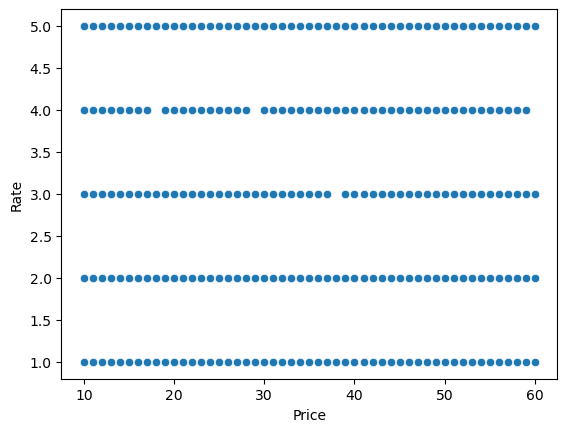

In [76]:
sns.scatterplot(data = df ,x = "Price",y = "Rate")

In [77]:
df["Price"].corr(df["Rate"])

0.02833597189938787

**The Rate doesn't affect the Book Price**

---

- ## Highest priced movies

In [86]:
Books_Price = df.groupby("Title")["Price"].sum().sort_values(ascending = False).head(3)
Books_Price

Title
The Star-Touched Queen               78
The Barefoot Contessa Cookbook       60
Last One Home (New Beginnings #1)    60
Name: Price, dtype: int32

- ## Highest Rated Movies

In [87]:
Books_Rate = df.groupby("Title")["Rate"].sum().sort_values(ascending = False).head(3)
Books_Rate

Title
The Star-Touched Queen                                                                  10
"Most Blessed of the Patriarchs": Thomas Jefferson and the Empire of the Imagination     5
Shopaholic Ties the Knot (Shopaholic #3)                                                 5
Name: Rate, dtype: int64

----

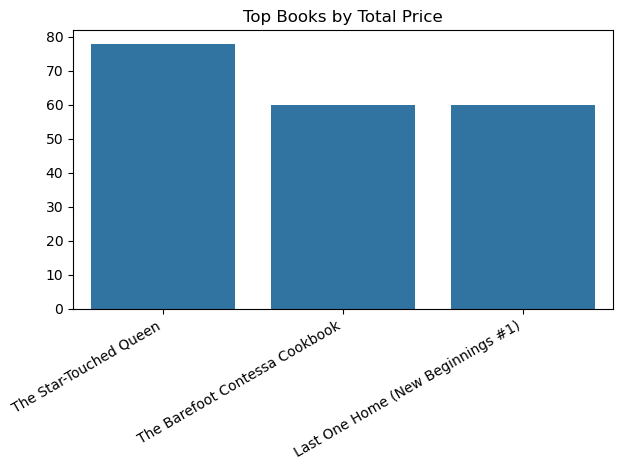

In [105]:
sns.barplot(Books_Price)
plt.title("Top Books by Total Price")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=30, ha='right') 
plt.tight_layout()
plt.show()

----

# Thank You